# 가설 1. 코로나 발생 이후 1인분 주문이 늘었을 것이다 (15000원 이하)
- 1인분 주문의 범위를 결제금액이 15000원 이하의 주문건으로 가정하였다.
- 코로나 발생 이후 외식이나 타인과 식사를 못하는 경우가 많아졌으므로 1인분 주문이 늘었을 것 이라고 생각하였다.

### delivery data
- GOODS_AMOUNT : 배달상품금액

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', size=12)

In [3]:
dlvy = pd.read_csv('./KT_data_20200717/delivery.csv')

In [4]:
# 6월 데이터 부족으로 6월 데이터 삭제하기
np.where(dlvy.PROCESS_DT == '2020-06-01')

(array([4681952, 4681953, 4681954, ..., 4708900, 4708901, 4708902],
       dtype=int64),)

In [5]:
dlvy = dlvy[:4681951]

In [6]:
# 시계열 데이터로 바꿔주기
dlvy['date'] = pd.to_datetime(dlvy['PROCESS_DT'])

In [7]:
# column 명 바꿔주기
dlvy.rename(columns={'GOODS_AMOUNT':'결제금액'}, inplace=True)

In [8]:
# 결제금액 15000원 이하 추출
alone = dlvy[dlvy['결제금액'] <= 15000].reset_index(drop=True)

In [9]:
alone_size = pd.DataFrame(alone.groupby('date').size(), columns = ['size'])
alone_size_week = alone_size.resample('W').sum()
alone_size_month = alone_size.resample('M').sum()

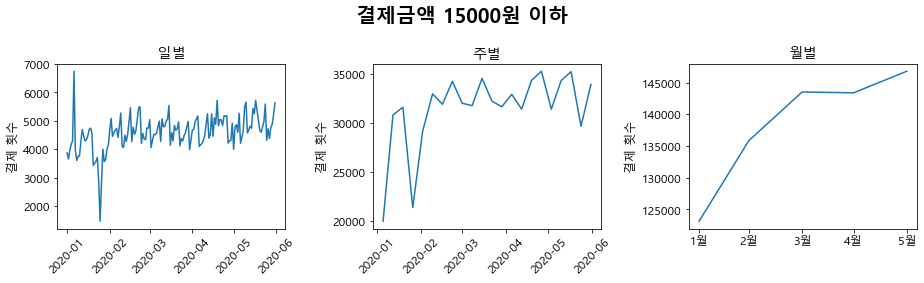

In [10]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.suptitle('결제금액 15000원 이하',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [11]:
not_alone = dlvy[dlvy['결제금액'] > 15000].reset_index(drop=True)

not_alone_size = pd.DataFrame(not_alone.groupby('date').size(), columns = ['size'])
not_alone_size_week = not_alone_size.resample('W').sum()
not_alone_size_month = not_alone_size.resample('M').sum()

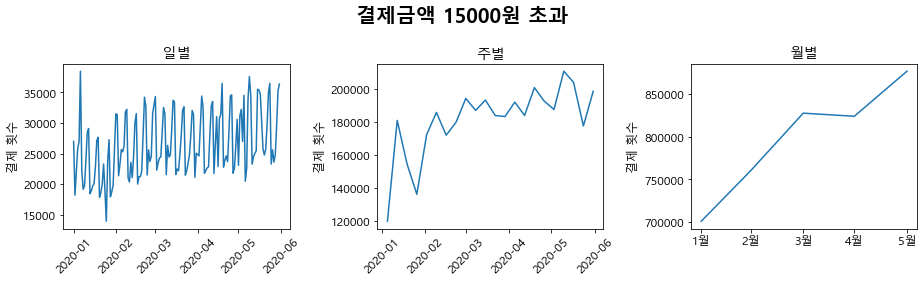

In [12]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(not_alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(not_alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(not_alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 15000원 초과',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [13]:
many = dlvy[dlvy['결제금액'] >= 50000].reset_index(drop=True)

many = pd.DataFrame(many.groupby('date').size(), columns = ['size'])
many_week = many.resample('W').sum()
many_month = many.resample('M').sum()

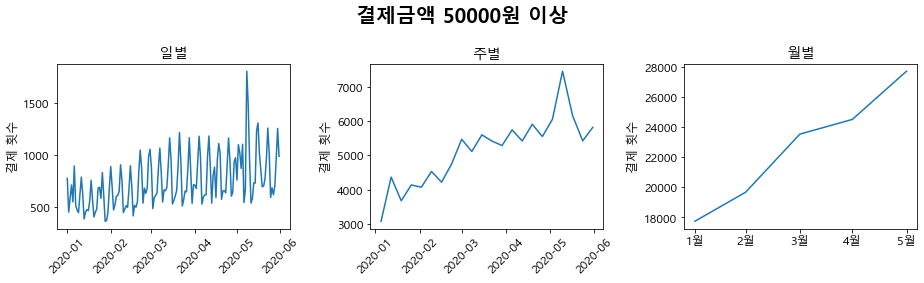

In [14]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(many)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(many_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(many_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 50000원 이상',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [15]:
total = pd.DataFrame(dlvy.groupby('date').size(), columns = ['size'])
total_week = total.resample('W').sum()
total_month = total.resample('M').sum()

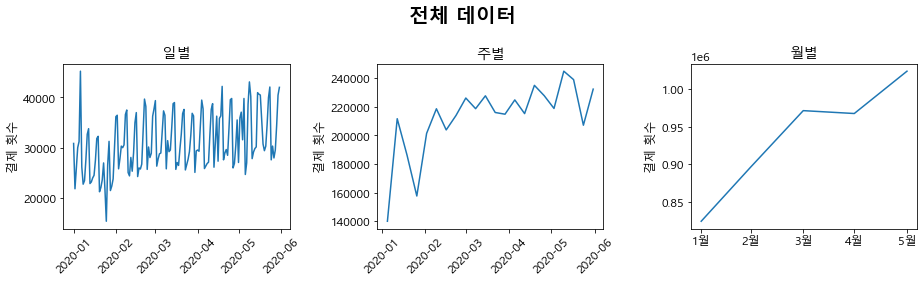

In [16]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(total)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(total_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(total_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.suptitle('전체 데이터',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

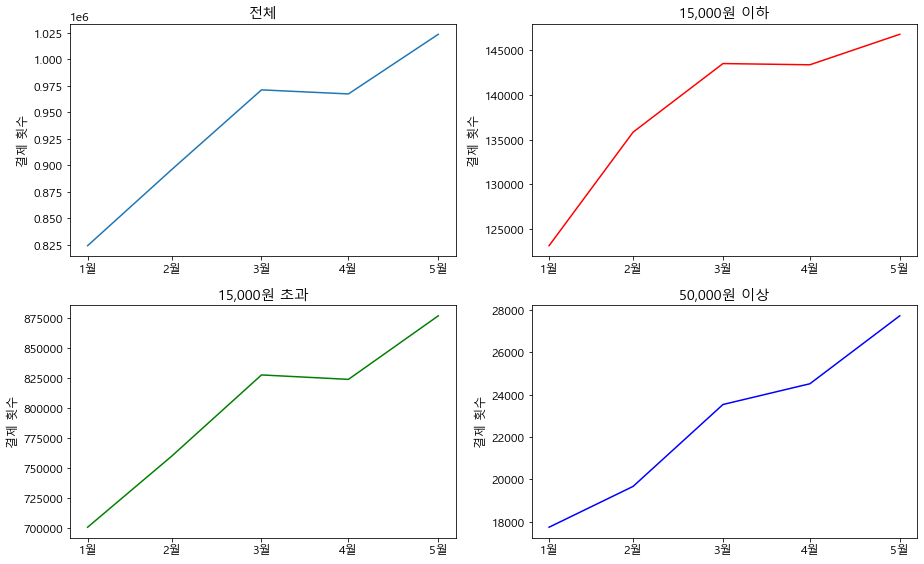

In [17]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(total_month)
plt.title('전체')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.subplot(2,2,2)
plt.plot(alone_size_month, c='r')
plt.title('15,000원 이하')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.subplot(2,2,3)
plt.plot(not_alone_size_month, c='g')
plt.title('15,000원 초과')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.subplot(2,2,4)
plt.plot(many_month, c='b')
plt.title('50,000원 이상')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.tight_layout()
plt.show()

- 전체적으로 모두 증가추세를 보였다.
- 50,000원 이상의 주문 건수가 뚜렷한 증가추세를 보여준다.

## 주문 건수의 증가를 확인하기에는 전체 주문건수에서 15,000원 이하의 데이터가 차지하는 비율을 확인 해보는 것이 좋을 것이라고 생각했다.

In [18]:
rate = alone_size / total * 100

In [19]:
rate_month = alone_size_month / total_month * 100

In [20]:
rate_week = alone_size_week / total_week * 100

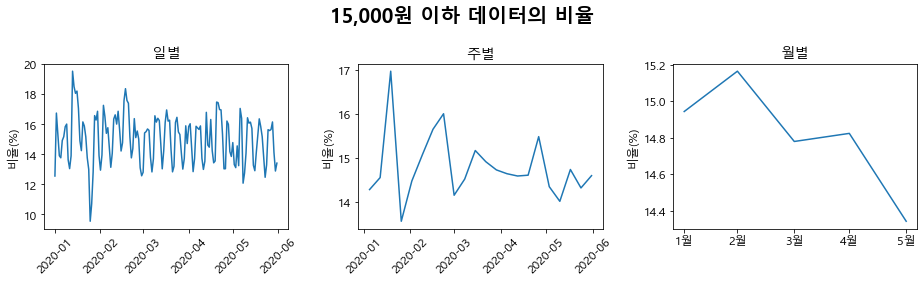

In [21]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(rate)
plt.title('일별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(rate_week)
plt.title('주별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(rate_month)
plt.title('월별')
plt.ylabel('비율(%)')
plt.xticks(total_month.index,values)

plt.suptitle('15,000원 이하 데이터의 비율',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

- 비율로 확인해 보았을 때, 오히려 15,000원 이하의 주문 건은 줄어든 것으로 확인되었다.

## 정리
- 코로나 이후 배달 주문의 양이 늘었을 것이다. 그 중 타인과의 식사가 많이 줄어들었을 것이고 따라서 1인분의 양으로 시켜먹는 건수가 많아졌을 것이라고 생각하였다.
- 15,000원 이하의 데이터만 뽑아보았을 때는 전체 데이터와 마찬가지로 증가하는 추세를 보였다. 하지만 오히려 뚜렷한 증가추세를 보인 것은 50,000원 이상의 데이터였다.
- 비율로 확인해 보았을 때는 15,000원 이하의 주문 건은 줄어들었다.
- 코로나 이후 1인분의 주문건수는 늘어났지만, 전체 비율에서는 오히려 줄어들었다.
- 코로나 이후 외식이 줄어들고 가족단위로 주문을 시키는 양이 늘었다고 생각해 볼 수 있었다.
___

# 가설 2. 코로나 발생 이후 국내 골프산업이 성장할 것이다
- 해외 출국 금지로 인해 국내 골프장의 수요가 증가할 것이다.
- 마스크의 착용 유무가 운동에 미치는 영향이 미미하기 때문에 마스크의 영향을 많이 받는 다른 운동을 하기 보다 골프를 더 많이 할 것이다.

In [22]:
card = pd.read_csv('./KT_data_20200717/card_20200717.csv')

In [23]:
card['date'] = pd.to_datetime(card['receipt_dttm'].astype(str))
del card['receipt_dttm']
card.rename(columns={'mrhst_induty_cl_nm':'항목','selng_cascnt' : '건수', 'salamt' : '금액', 'mrhst_induty_cl_code' : '업종코드'}, inplace=True)

In [24]:
# 데이터기 적은 6월 데이터 삭제하기
np.where(card.date == '2020-06-01')

(array([3333538, 3333539, 3333540, ..., 3353973, 3353974, 3353975],
       dtype=int64),)

In [25]:
card = card[:3333538]

In [26]:
# 건수의 음수 값 삭제
card = card.drop(np.where(card['건수'] < 0)[0].tolist(),0).reset_index(drop=True)

In [27]:
code2 = card[card['업종코드']//1000 == 2]

In [28]:
code2['항목'].unique()  # 골프경기장, 골프연습장, 스크린골프, 골프 용품

array(['기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품', '화   원', '애완 동물', '영화관',
       '스크린골프', '골프연습장', '골프 용품', '민예공예품', '악 기 점', '화방표구점', '수 족 관',
       '티켓', '화   랑', '문화취미기타', '테니스 장', '볼 링 장', '수 영 장', '종합레져타운',
       '골프경기장', '카지노', '스 키 장', '골동품 점', '피아노대리점', '총포류판매'], dtype=object)

In [29]:
golf_count = code2.groupby(['date','항목'])['건수'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)
golf_money = code2.groupby(['date','항목'])['금액'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)

In [30]:
golf_count_week = golf_count.resample('W').sum()
golf_money_week = golf_money.resample('W').sum()

In [31]:
golf_count_month = golf_count.resample('M').sum()
golf_money_month = golf_money.resample('M').sum()

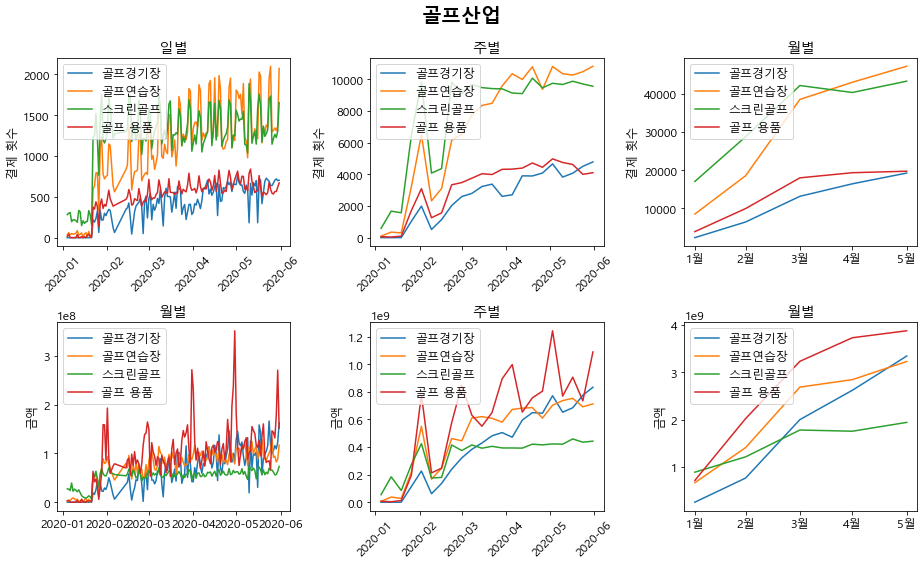

In [32]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8) 

plt.subplot(2, 3, 1)                
plt.plot(golf_count)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count.columns)

plt.subplot(2, 3, 2)                
plt.plot(golf_count_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count_week.columns)

plt.subplot(2, 3, 3)                
plt.plot(golf_count_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)
plt.legend(golf_count_month.columns)

plt.subplot(2, 3, 4)                
plt.plot(golf_money)
plt.title('월별')
plt.ylabel('금액')
plt.legend(golf_money.columns)

plt.subplot(2, 3, 5)                
plt.plot(golf_money_week)
plt.title('주별')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(golf_money_week.columns)

plt.subplot(2, 3, 6)                
plt.plot(golf_money_month)
plt.title('월별')
plt.ylabel('금액')
plt.xticks(golf_money_month.index,values)
plt.legend(golf_money_month.columns)

plt.suptitle('골프산업',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

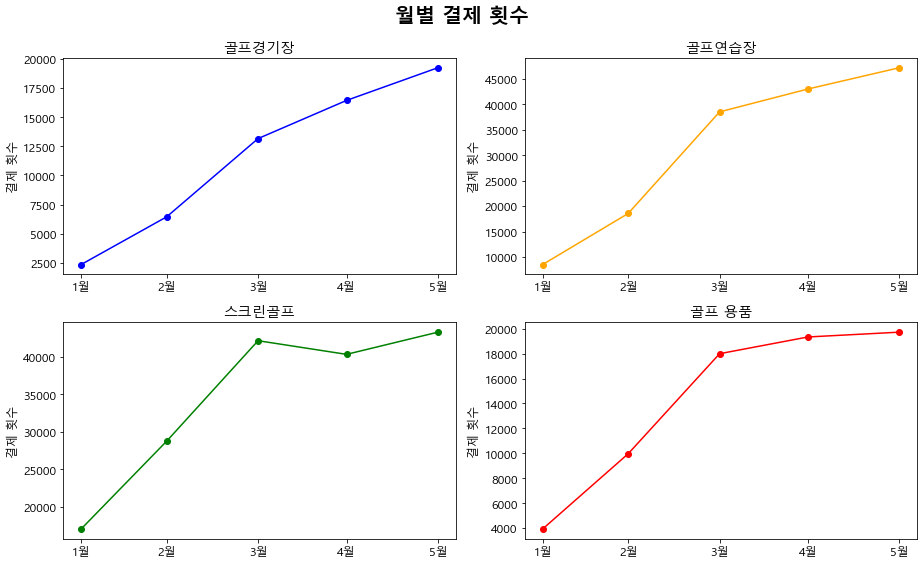

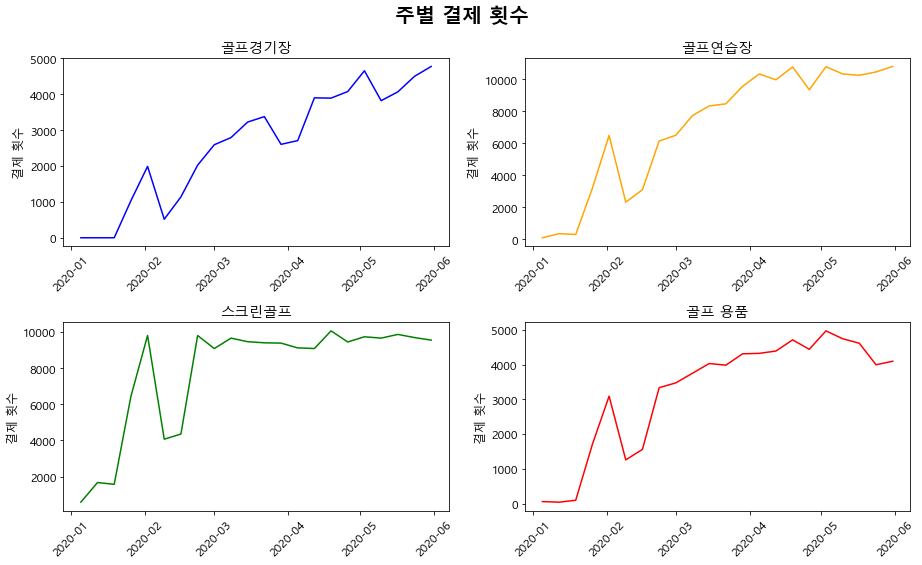

In [33]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_count_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_count_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_count_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.suptitle('월별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

#########
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_count_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_count_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_count_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

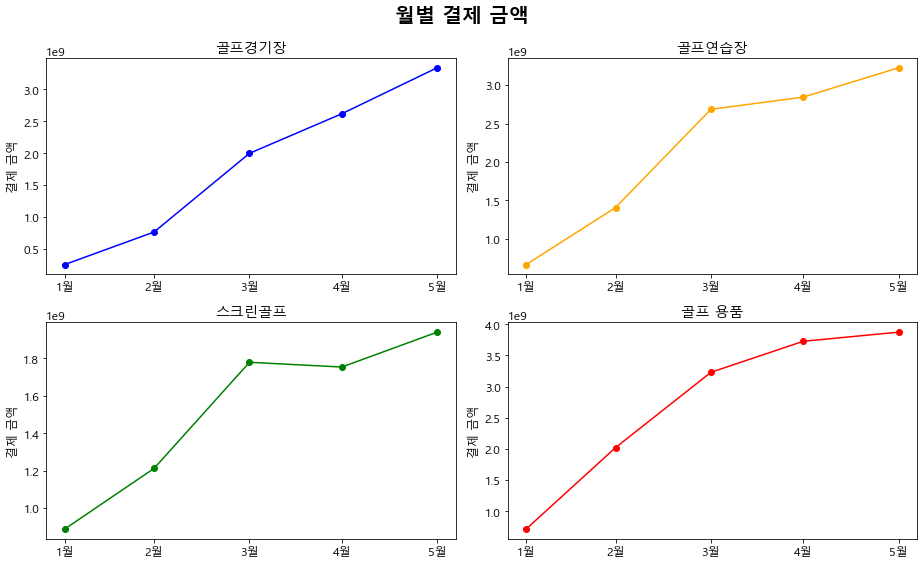

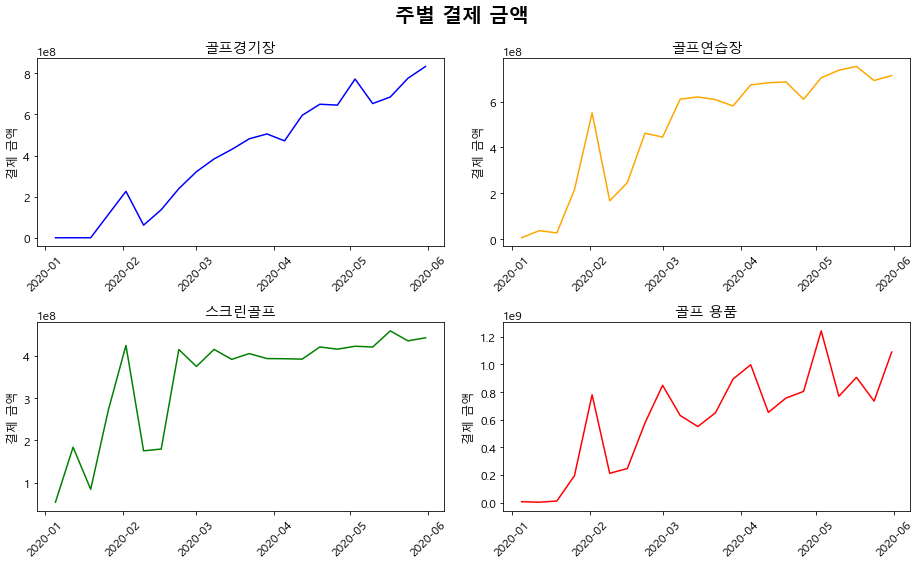

In [34]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_money_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_money_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_money_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.suptitle('월별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

############
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_money_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_money_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_money_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

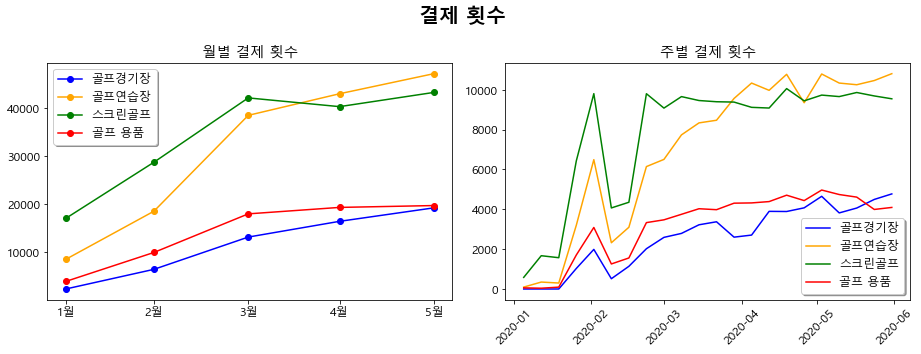

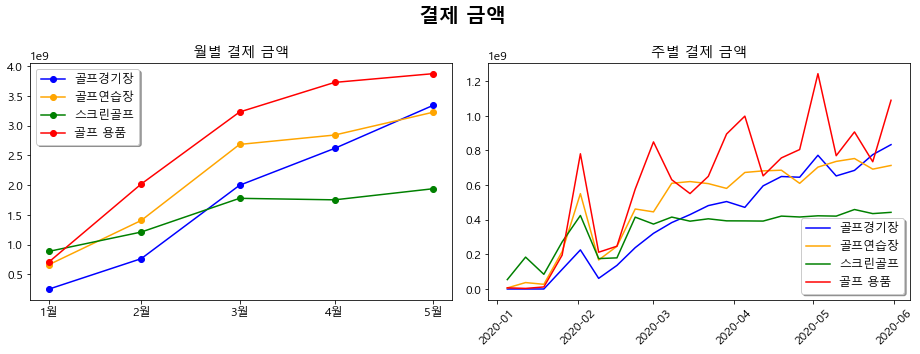

In [35]:
# 결제 횟수
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_count_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_count_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_count_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_count_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 횟수')

plt.subplot(1,2,2)
plt.plot(golf_count_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_count_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_count_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_count_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 횟수')
           
plt.suptitle('결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

# 결제 금액
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_money_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_money_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_money_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_money_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 금액')

plt.subplot(1,2,2)
plt.plot(golf_money_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_money_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_money_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_money_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 금액')
           
plt.suptitle('결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

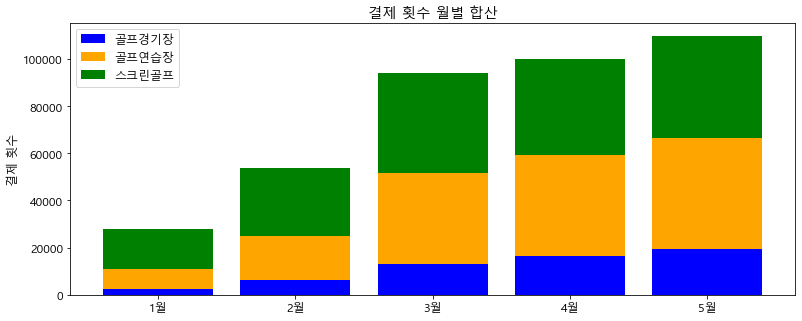

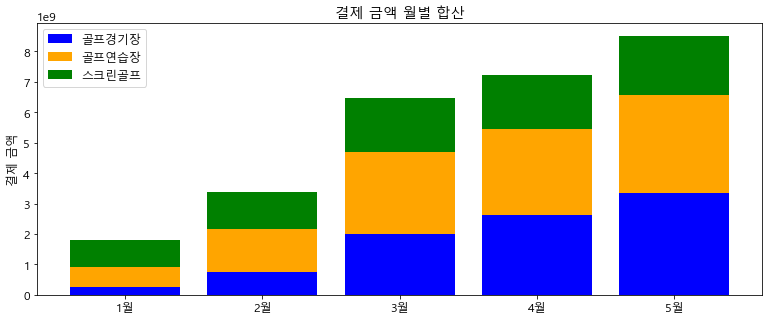

In [36]:
data = golf_count_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 횟수')
plt.title('결제 횟수 월별 합산')
plt.show()

############
data = golf_money_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 금액')
plt.title('결제 금액 월별 합산')
plt.show()

- 코로나 이후 국내 골프산업은 전체적으로 증가한 것으로 보인다.
- 4개의 분야 모두 증가한 것을 알 수 있다.
- 골프경기장, 골프연습장, 스크린골프의 분야를 결제 금액에서 보았을 때, 1월에는 스크린골프 > 골프연습장 > 골프경기장 순으로 결제 금액이 높았으나, 5월이 되어서는 순서가 반전되어 골프경기장 > 골프연습장 > 스크린골프 순으로 결제 금액이 높아졌다.
- 해외로 나갈 수 없는 상황에서 골프경기를 하기위해 국내의 골프경기장을 찾는 사람들이 많아졌다는 것을 알 수 있다.